In [2]:
import requests
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv"
res = requests.get(url, allow_redirects=True)
with open("income.csv", "wb") as file:
    file.write(res.content)

In [3]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


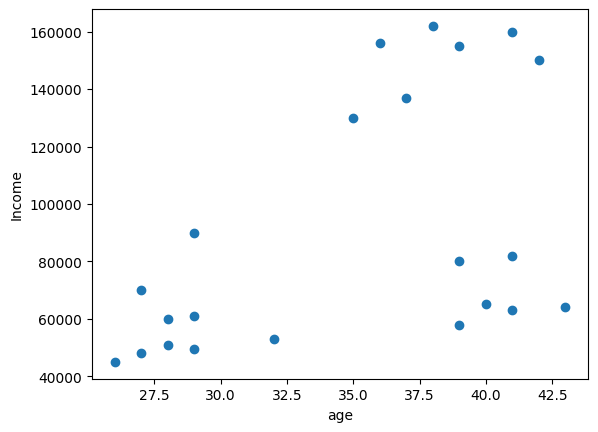

In [4]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel("age")
plt.ylabel("Income")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)